Required Imports: 

In [18]:
import bluequbit                   # Library for interfacing with Bluequbit's quantum hardware and simulators
from qiskit import QuantumCircuit  # IBM-Qiskit Library for interperting quantum circuits
from qiskit.visualization import plot_histogram
import numpy as np  
import matplotlib.pyplot as plt            

Loading the Quantum Circuit from the QASM file
'P1_little_peak.qasm' is a file containing a valid quantum circuit described in the OpenQASM format.

In [ ]:
qc = QuantumCircuit.from_qasm_file('P1_little_peak.qasm')      # Creating Quantum Circuit from QASM file
qc.measure_all()                                               # Adding measurement gates to all qubits
bq = bluequbit.init("<token>")                                 # Intializing BQClient with API token (We have not revealed our API keys
shots = 100                                                    # Number of shots. This paramter can be varied here. 100 shots is enough for this 4 qubit circuit.
result = bq.run(qc, device='cpu', shots = shots)               # Running the circuit on the cpu simulator of Blue Qubit

Classical Post-Processing

In [14]:
# Retrieve measurement counts from the quantum execution results.
# 'counts' is a dictionary mapping bitstrings (as strings) to the frequency
counts = result.get_counts()

# Initializing variables to track the bitstring with the highest count.
peaked_counts = 0           # Store the maximum frequency found so far.
peaked_bitstring = None     # Store the corresponding bitstring.

# Iterating over each bitstring present in the measurement counts and updating variables accordingly.
for bitstring in counts:
   if counts[bitstring] > peaked_counts:
        peaked_counts = counts[bitstring]
        peaked_bitstring=bitstring

# Outputting the results:
# - The bitstring with the highest frequency.
# - Its frequency (i.e., how many times it was measured).
# - The total number of shots (the total number of circuit executions),
#   assumed to be stored in the variable 'shots'.
# - The "peaked amplitude" computed as the square root of the ratio between the
#   highest frequency and the total shots.
print("Peaked Bitstring : ", peaked_bitstring)
print("Frequency :", peaked_counts)
print("Total Shots :", shots)
print("Peaked Amplitude :", np.sqrt(peaked_counts/shots))

Peaked Bitstring :  1001
Frequency : 69
Total Shots : 100
Peaked Amplitude : 0.8306623862918074


In [ ]:
Visualization

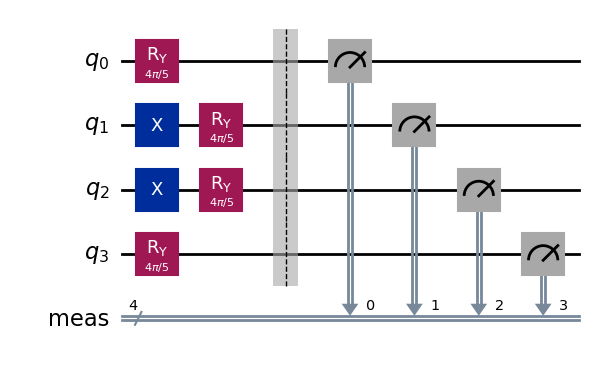

In [16]:
qc.draw('mpl')  # Visualizing the quantum circuit using Matplotlib

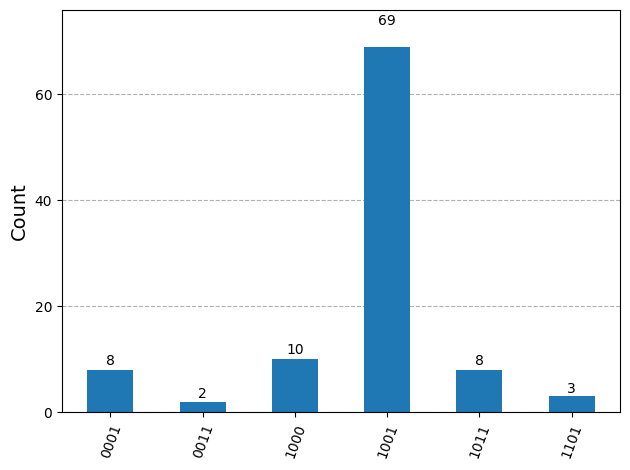

In [20]:
plot_histogram(counts)  # Visualizing the measurement counts using a histogram. We can see the peaked bitstring ('1001') in the histogram.